# Project Overview

**Project Title:**  
**Energy-Based DINOv2 Novelty Detection for Transfer Learning**

**Author:**  
**Sibi Marappan**  
Master’s Student, Columbia University  
**UNI:** `sm5726`

---

## Description

This project explores a transfer learning-based approach for multi-label image classification under domain shift. Specifically, it focuses on predicting both **super-class** and **sub-class** labels in the presence of **novel categories** at test time. Our method leverages the **DINOv2 ViT-B/14** backbone combined with an **energy-based novelty detection mechanism**, significantly improving unseen-class generalization over baseline models such as CLIP-B/32 and a CNN classifier.

---

## Dataset

- Natural images (64×64 or resized to 224×224) across:
  - **Super-classes**: `bird`, `dog`, `reptile`, and `novel`
  - **Fine-grained sub-classes**: 87 seen + 1 novel
- Dataset includes:
  - `train_images.zip` (6,288 images)
  - `test_images.zip` (11,180 images)
  - `train_data.csv`
  - `superclass_mapping.csv`
  - `subclass_mapping.csv`

---

## Files to Upload

To replicate the results, upload the following files before running the notebook:

- `train_images.zip`  
- `test_images.zip`  
- `train_data.csv`  
- `superclass_mapping.csv`  
- `subclass_mapping.csv`  

---

## Repository and Leaderboard

- **GitHub Repository:** https://github.com/Sibi-Git/dinov2-novelty-transfer
- **Leaderboard:** https://nndl-course-leaderboard.web.app


## Execution Steps

1. **Section 1: V1 – Model Training**  
   - Loads DINOv2 backbone and trains the classification heads.  
   - Outputs base model weights (`dinov2_model.pth`).
   - Outputs prediction CSV `sm5726_test_predictions.csv`.

2. **Section 2: V2 – Novelty Detection with Energy Thresholds**  
   - Loads V1 weights and computes energy thresholds for novel super/sub-class detection.
   - Outputs improved model weights (`dinov2_v2_clean.pth`).
   - Outputs prediction CSV `sm5726_test_predictions_v2`.

3. **Section 3: Metrics Evaluation**  
   - Computes categorical cross-entropy, seen/unseen accuracy, and formats evaluation plots/tables.
---

# V1 : Base DinoV2 Model Prediction

- Paper: https://arxiv.org/abs/2304.07193
- Github: https://github.com/facebookresearch/dinov2

##  Install and Load DINOv2 ViT-B/14 (with registers)
We load the pretrained `dinov2_vitb14_reg` model as our frozen backbone. This model is trained via self-supervised learning and is known for strong generalization to novel or out-of-distribution classes.


In [ ]:
# Adding to Fix Dependencies error
# Install PyTorch 2.7.0 + compatible torchvision and torchaudio
!pip install --upgrade --force-reinstall torch==2.7.0+cu126 torchvision==0.22.0+cu126 torchaudio==2.7.0 --index-url https://download.pytorch.org/whl/cu126

# Force install a compatible xformers version
!pip install xformers==0.0.30 -q --upgrade --no-deps

Looking in indexes: https://download.pytorch.org/whl/cu126
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 60.9/60.9 kB 3.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 536.2/536.2 kB 12.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 867.0/867.0 MB 1.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.5/7.5 MB 127.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.5/3.5 MB 112.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 393.1/393.1 MB 2.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8.9/8.9 MB 123.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 23.7/23.7 MB 98.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 897.7/897.7 kB 56.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 571.0/571.0 MB 1.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 200.2/200.2 MB 10.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.1/1.1 MB 62.5 MB/s 

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 31.5/31.5 MB 72.2 MB/s eta 0:00:00


In [ ]:
# Clone official DINOv2 repo
!git clone https://github.com/facebookresearch/dinov2.git
%cd dinov2

# Install all required dependencies
# Force install a compatible xformers version
!pip install xformers==0.0.30 -q --upgrade --no-deps
!pip install -r requirements.txt -q
!pip install -e . -q

Cloning into 'dinov2'...
remote: Enumerating objects: 485, done.
remote: Counting objects: 100% (295/295), done.
remote: Compressing objects: 100% (120/120), done.
remote: Total 485 (delta 193), reused 175 (delta 175), pack-reused 190 (from 1)
Receiving objects: 100% (485/485), 1.11 MiB | 8.04 MiB/s, done.
Resolving deltas: 100% (243/243), done.
/content/dinov2
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.8/1.8 GB 991.9 kB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.1/6.1 MB 124.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 50.2/50.2 kB 2.0 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 42.2/42.2 kB 3.3 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
ERROR: Could not find a version that satisfies the requirement xformers==0.0.18 (from versions: 0.0.1, 0.0.2, 0.0.3, 0.0.4, 0.0.5, 0.0.6, 0.0.7, 0.0.8, 0.0.9, 0.0.10, 0.0.11, 0.0.12, 0.0.13, 0.0.16rc424, 0.0.16rc425, 0.0.16, 0.0.20, 0

In [ ]:
import torch

# Load DINOv2 ViT-B/14 with register tokens via torch hub
backbone = torch.hub.load('facebookresearch/dinov2', 'dinov2_vitb14_reg')
backbone.eval()

# Move to CUDA if available
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
backbone.to(device)

# Dummy input to confirm
dummy_input = torch.randn(1, 3, 518, 518).to(device)
with torch.no_grad():
    output = backbone(dummy_input)

print("Output shape:", output.shape)

Downloading: "https://github.com/facebookresearch/dinov2/zipball/main" to /root/.cache/torch/hub/main.zip


/root/.cache/torch/hub/facebookresearch_dinov2_main/dinov2/layers/swiglu_ffn.py:43: UserWarning: xFormers is available (SwiGLU)
  warnings.warn("xFormers is available (SwiGLU)")
/root/.cache/torch/hub/facebookresearch_dinov2_main/dinov2/layers/attention.py:27: UserWarning: xFormers is available (Attention)
  warnings.warn("xFormers is available (Attention)")
/root/.cache/torch/hub/facebookresearch_dinov2_main/dinov2/layers/block.py:33: UserWarning: xFormers is available (Block)
  warnings.warn("xFormers is available (Block)")


Downloading: "https://dl.fbaipublicfiles.com/dinov2/dinov2_vitb14/dinov2_vitb14_reg4_pretrain.pth" to /root/.cache/torch/hub/checkpoints/dinov2_vitb14_reg4_pretrain.pth


100%|██████████| 330M/330M [00:01<00:00, 293MB/s]


Output shape: torch.Size([1, 768])


In [ ]:
import torch.nn as nn

class DualHeadClassifier(nn.Module):
    def __init__(self, backbone, num_superclasses=4, num_subclasses=88):
        super().__init__()
        self.backbone = backbone  # Pretrained DINOv2 backbone (outputs 768-dim)
        self.super_head = nn.Linear(768, num_superclasses)   # bird, dog, reptile, novel
        self.sub_head = nn.Linear(768, num_subclasses)       # 87 seen + 1 novel

    def forward(self, x):
        features = self.backbone(x)                          # [B, 768]
        super_logits = self.super_head(features)             # [B, 4]
        sub_logits = self.sub_head(features)                 # [B, 88]
        return super_logits, sub_logits

In [ ]:
# Create full model with DINOv2 backbone + dual classifier heads
model = DualHeadClassifier(backbone=backbone, num_superclasses=4, num_subclasses=88)

# Push to device (GPU if available)
model = model.to(device)

# Print summary
print("Model ready on:", device)

Model ready on: cuda


## Dataset: Load official train_data.csv and inspect sample



In [ ]:
import pandas as pd

# Load from /content directory
train_ann_df = pd.read_csv("/content/train_data.csv")
super_map_df = pd.read_csv("/content/superclass_mapping.csv")
sub_map_df = pd.read_csv("/content/subclass_mapping.csv")

# Preview
print("Train data sample:")
print(train_ann_df.head())

print("\nSuperclass mapping:")
print(super_map_df)

print("\nSubclass mapping sample:")
print(sub_map_df.head())

Train data sample:
   image  superclass_index  subclass_index  \
0  0.jpg                 1              37   
1  1.jpg                 0              42   
2  2.jpg                 1              62   
3  3.jpg                 1              31   
4  4.jpg                 0               4   

                                         description  
0  nature photograph of a dog, specifically a Mal...  
1  nature photograph of a bird, specifically a oy...  
2  nature photograph of a dog, specifically a Afg...  
3  nature photograph of a dog, specifically a Shi...  
4  nature photograph of a bird, specifically a gr...  

Superclass mapping:
   index    class
0      0     bird
1      1      dog
2      2  reptile
3      3    novel

Subclass mapping sample:
   index                                           class
0      0       Scotch terrier, Scottish terrier, Scottie
1      1         African chameleon, Chamaeleo chamaeleon
2      2                              standard schnauzer
3      3 

## Dataset: Define custom Dataset class for multi-label classification


In [ ]:
import os
from PIL import Image
from torch.utils.data import Dataset

class MultiClassImageDataset(Dataset):
    def __init__(self, ann_df, super_map_df, sub_map_df, img_dir, transform=None):
        self.ann_df = ann_df
        self.super_map_df = super_map_df
        self.sub_map_df = sub_map_df
        self.img_dir = img_dir
        self.transform = transform

    def __len__(self):
        return len(self.ann_df)

    def __getitem__(self, idx):
        img_name = self.ann_df['image'][idx]
        img_path = os.path.join(self.img_dir, img_name)
        image = Image.open(img_path).convert('RGB')

        super_idx = self.ann_df['superclass_index'][idx]
        sub_idx = self.ann_df['subclass_index'][idx]

        if self.transform:
            image = self.transform(image)

        return image, super_idx, sub_idx

## Dataset: Setup transforms, dataset splits, and DataLoaders

In [ ]:
from torchvision import transforms
from torch.utils.data import DataLoader, random_split

# Image preprocessing for DINOv2 (224x224)
image_preprocessing = transforms.Compose([
    transforms.Resize((224, 224)),
    transforms.ToTensor(),
    transforms.Normalize(mean=(0.5,), std=(0.5,)),  # grayscale mean/std as placeholder
])

# Set image directory (unzip this before running if needed)
train_img_dir = "/content/train_shuffle"

# Initialize full dataset
full_dataset = MultiClassImageDataset(train_ann_df, super_map_df, sub_map_df, train_img_dir, transform=image_preprocessing)

# Train/Val split
train_size = int(0.9 * len(full_dataset))
val_size = len(full_dataset) - train_size
train_dataset, val_dataset = random_split(full_dataset, [train_size, val_size])

# DataLoaders
batch_size = 64
train_loader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True)
val_loader = DataLoader(val_dataset, batch_size=batch_size, shuffle=False)

print(f"Loaded {len(train_dataset)} training samples and {len(val_dataset)} validation samples.")

Loaded 5659 training samples and 629 validation samples.


## Training: Define device, loss function, and optimizer


In [ ]:
import torch
import torch.nn as nn
import torch.optim as optim

device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model = model.to(device)

# Loss function
criterion = nn.CrossEntropyLoss()

# Optimizer
optimizer = optim.AdamW(model.parameters(), lr=5e-5, weight_decay=1e-4)

print("Model, loss, and optimizer initialized on", device)

Model, loss, and optimizer initialized on cuda


## Training: Run training and validation loop


In [ ]:
import zipfile

with zipfile.ZipFile("/content/train_images.zip", "r") as zip_ref:
    zip_ref.extractall("/content/train_shuffle")

In [ ]:
from tqdm.notebook import tqdm  # using tqdm for progress bars

num_epochs = 10

for epoch in range(num_epochs):
    model.train()
    running_loss = 0.0
    print(f"\nEpoch {epoch+1}/{num_epochs} - Training")
    for images, super_labels, sub_labels in tqdm(train_loader, desc="Training", leave=False):
        images = images.to(device)
        super_labels = super_labels.to(device)
        sub_labels = sub_labels.to(device)

        optimizer.zero_grad()
        super_out, sub_out = model(images)

        loss = criterion(super_out, super_labels) + criterion(sub_out, sub_labels)
        loss.backward()
        optimizer.step()

        running_loss += loss.item()

    avg_train_loss = running_loss / len(train_loader)

    model.eval()
    correct_super, correct_sub, total = 0, 0, 0
    val_loss = 0.0
    print(f"Epoch {epoch+1}/{num_epochs} - Validation")
    with torch.no_grad():
        for images, super_labels, sub_labels in tqdm(val_loader, desc="Validation", leave=False):
            images = images.to(device)
            super_labels = super_labels.to(device)
            sub_labels = sub_labels.to(device)

            super_out, sub_out = model(images)
            loss = criterion(super_out, super_labels) + criterion(sub_out, sub_labels)
            val_loss += loss.item()

            _, super_preds = torch.max(super_out, 1)
            _, sub_preds = torch.max(sub_out, 1)

            correct_super += (super_preds == super_labels).sum().item()
            correct_sub += (sub_preds == sub_labels).sum().item()
            total += super_labels.size(0)

    avg_val_loss = val_loss / len(val_loader)
    super_acc = 100 * correct_super / total
    sub_acc = 100 * correct_sub / total

    print(f"Train Loss: {avg_train_loss:.4f} | Val Loss: {avg_val_loss:.4f} | Super Acc: {super_acc:.2f}% | Sub Acc: {sub_acc:.2f}%")


Epoch 1/10 - Training


Training:   0%|          | 0/89 [00:00<?, ?it/s]

Epoch 1/10 - Validation


Validation:   0%|          | 0/10 [00:00<?, ?it/s]

Train Loss: 1.5341 | Val Loss: 0.3901 | Super Acc: 100.00% | Sub Acc: 93.80%

Epoch 2/10 - Training


Training:   0%|          | 0/89 [00:00<?, ?it/s]

Epoch 2/10 - Validation


Validation:   0%|          | 0/10 [00:00<?, ?it/s]

Train Loss: 0.1762 | Val Loss: 0.1982 | Super Acc: 100.00% | Sub Acc: 95.39%

Epoch 3/10 - Training


Training:   0%|          | 0/89 [00:00<?, ?it/s]

Epoch 3/10 - Validation


Validation:   0%|          | 0/10 [00:00<?, ?it/s]

Train Loss: 0.0632 | Val Loss: 0.1839 | Super Acc: 100.00% | Sub Acc: 95.39%

Epoch 4/10 - Training


Training:   0%|          | 0/89 [00:00<?, ?it/s]

Epoch 4/10 - Validation


Validation:   0%|          | 0/10 [00:00<?, ?it/s]

Train Loss: 0.0460 | Val Loss: 0.1227 | Super Acc: 100.00% | Sub Acc: 96.18%

Epoch 5/10 - Training


Training:   0%|          | 0/89 [00:00<?, ?it/s]

Epoch 5/10 - Validation


Validation:   0%|          | 0/10 [00:00<?, ?it/s]

Train Loss: 0.0112 | Val Loss: 0.0911 | Super Acc: 100.00% | Sub Acc: 96.98%

Epoch 6/10 - Training


Training:   0%|          | 0/89 [00:00<?, ?it/s]

Epoch 6/10 - Validation


Validation:   0%|          | 0/10 [00:00<?, ?it/s]

Train Loss: 0.0075 | Val Loss: 0.0947 | Super Acc: 100.00% | Sub Acc: 96.98%

Epoch 7/10 - Training


Training:   0%|          | 0/89 [00:00<?, ?it/s]

Epoch 7/10 - Validation


Validation:   0%|          | 0/10 [00:00<?, ?it/s]

Train Loss: 0.0055 | Val Loss: 0.0759 | Super Acc: 100.00% | Sub Acc: 97.77%

Epoch 8/10 - Training


Training:   0%|          | 0/89 [00:00<?, ?it/s]

Epoch 8/10 - Validation


Validation:   0%|          | 0/10 [00:00<?, ?it/s]

Train Loss: 0.0039 | Val Loss: 0.0751 | Super Acc: 100.00% | Sub Acc: 97.62%

Epoch 9/10 - Training


Training:   0%|          | 0/89 [00:00<?, ?it/s]

Epoch 9/10 - Validation


Validation:   0%|          | 0/10 [00:00<?, ?it/s]

Train Loss: 0.0032 | Val Loss: 0.0759 | Super Acc: 100.00% | Sub Acc: 97.93%

Epoch 10/10 - Training


Training:   0%|          | 0/89 [00:00<?, ?it/s]

Epoch 10/10 - Validation


Validation:   0%|          | 0/10 [00:00<?, ?it/s]

Train Loss: 0.0027 | Val Loss: 0.0758 | Super Acc: 100.00% | Sub Acc: 97.93%


In [ ]:
import os
import torch

# Define save path
model_dir = "/content/saved_models"
model_save_path = os.path.join(model_dir, "dinov2_model.pth")

# Create directory if it doesn't exist
os.makedirs(model_dir, exist_ok=True)

# Save model
torch.save(model.state_dict(), model_save_path)
print(f"Model saved to {model_save_path}")

Model saved to /content/saved_models/dinov2_model.pth


## Load: Restore saved model weights for inference


In [ ]:
# Load model weights before prediction
model.load_state_dict(torch.load(model_save_path))
model.eval()

print("Model loaded and ready for test inference.")

Model loaded and ready for test inference.


## Predict: Generate test_predictions.csv for leaderboard


In [ ]:
import zipfile

with zipfile.ZipFile("/content/test_images.zip", "r") as zip_ref:
    zip_ref.extractall("/content/test_shuffle")

print("Test images extracted.")

Test images extracted.


In [ ]:
from torch.utils.data import Dataset, DataLoader
from torchvision import transforms
from PIL import Image
import pandas as pd
from tqdm.notebook import tqdm

# Test image path
test_img_dir = "/content/test_shuffle"

# Apply same transforms as training
test_transform = transforms.Compose([
    transforms.Resize((224, 224)),
    transforms.ToTensor(),
    transforms.Normalize(mean=(0.5,), std=(0.5,))
])

# Create test dataset class
class TestImageDataset(Dataset):
    def __init__(self, img_dir, transform=None):
        self.img_dir = img_dir
        self.image_files = sorted(os.listdir(img_dir), key=lambda x: int(x.split('.')[0]))
        self.transform = transform

    def __len__(self):
        return len(self.image_files)

    def __getitem__(self, idx):
        img_name = self.image_files[idx]
        img_path = os.path.join(self.img_dir, img_name)
        image = Image.open(img_path).convert('RGB')
        if self.transform:
            image = self.transform(image)
        return image, img_name

# Setup loader
test_dataset = TestImageDataset(test_img_dir, transform=test_transform)
test_loader = DataLoader(test_dataset, batch_size=1, shuffle=False)

# Predict and collect results
model.eval()
test_preds = {
    "image": [],
    "superclass_index": [],
    "subclass_index": []
}

with torch.no_grad():
    for images, img_names in tqdm(test_loader, desc="Generating predictions", leave=False):
        images = images.to(device)
        super_logits, sub_logits = model(images)
        super_preds = torch.argmax(super_logits, dim=1).cpu().item()
        sub_preds = torch.argmax(sub_logits, dim=1).cpu().item()

        test_preds["image"].append(img_names[0])
        test_preds["superclass_index"].append(super_preds)
        test_preds["subclass_index"].append(sub_preds)

# Save to CSV
submission_df = pd.DataFrame(test_preds)
submission_df.to_csv("/content/sm5726_test_predictions.csv", index=False)

print("sm5726_test_predictions.csv generated successfully.")

Generating predictions:   0%|          | 0/11179 [00:00<?, ?it/s]

sm5726_test_predictions.csv generated successfully.


## Inspect: Preview contents of sm5726_test_predictions.csv


In [ ]:
# Load and preview first few rows of the predictions CSV
df_pred = pd.read_csv("/content/sm5726_test_predictions.csv")
print(f"Total predictions: {len(df_pred)}\n")
df_pred.head(10)

Total predictions: 11179



,image,superclass_index,subclass_index
0,0.jpg,1,45
1,1.jpg,0,16
2,2.jpg,2,34
3,3.jpg,2,68
4,4.jpg,1,25
5,5.jpg,2,15
6,6.jpg,0,5
7,7.jpg,2,43
8,8.jpg,0,42
9,9.jpg,2,68


# V2: Improving Unseen Class Detection:

- Method: Energy-Based Novelty Detection : https://arxiv.org/abs/2010.03759

In [ ]:
import torch.nn.functional as F
import numpy as np

# Helper function to compute energy score
def compute_energy(logits):
    return -torch.logsumexp(logits, dim=1)

# Estimate energy thresholds using validation set
super_energy_scores = []
sub_energy_scores = []

model.eval()
with torch.no_grad():
    for images, super_labels, sub_labels in val_loader:
        images = images.to(device)
        super_logits, sub_logits = model(images)

        super_energy = compute_energy(super_logits)
        sub_energy = compute_energy(sub_logits)

        super_energy_scores.extend(super_energy.cpu().numpy())
        sub_energy_scores.extend(sub_energy.cpu().numpy())

# Convert to numpy arrays
super_energy_scores = np.array(super_energy_scores)
sub_energy_scores = np.array(sub_energy_scores)

# Set novelty thresholds (mean + 1 std dev)
super_thresh = super_energy_scores.mean() + super_energy_scores.std()
sub_thresh = sub_energy_scores.mean() + sub_energy_scores.std()

print(f"Superclass novelty threshold: {super_thresh:.4f}")
print(f"Subclass novelty threshold: {sub_thresh:.4f}")

Superclass novelty threshold: -6.0745
Subclass novelty threshold: -9.5194


In [ ]:
torch.save(model.state_dict(), "/content/saved_models/dinov2_v2_clean.pth")
print("✅ V2 clean backbone saved to: /content/saved_models/dinov2_v2_clean.pth")

✅ V2 clean backbone saved to: /content/saved_models/dinov2_v2_clean.pth


In [ ]:
from tqdm import tqdm

# New predictions dictionary
novel_preds = {
    "image": [],
    "superclass_index": [],
    "subclass_index": []
}

model.eval()
with torch.no_grad():
    for images, img_names in tqdm(test_loader, desc="Running Novelty-Aware Inference"):
        images = images.to(device)
        super_logits, sub_logits = model(images)

        super_energy = compute_energy(super_logits)
        sub_energy = compute_energy(sub_logits)

        # Threshold comparison
        super_pred = 3 if super_energy.item() > super_thresh else torch.argmax(super_logits, dim=1).item()
        sub_pred = 87 if sub_energy.item() > sub_thresh else torch.argmax(sub_logits, dim=1).item()

        novel_preds["image"].append(img_names[0])
        novel_preds["superclass_index"].append(super_pred)
        novel_preds["subclass_index"].append(sub_pred)

# Save to CSV
novel_df = pd.DataFrame(novel_preds)
novel_df.to_csv("/content/sm5726_test_predictions_v2.csv", index=False)

print("sm5726_test_predictions_v2.csv generated successfully with energy-based novelty detection.")

Running Novelty-Aware Inference: 100%|██████████| 11179/11179 [02:09<00:00, 86.03it/s]

sm5726_test_predictions_v2.csv generated successfully with energy-based novelty detection.


# Metrics

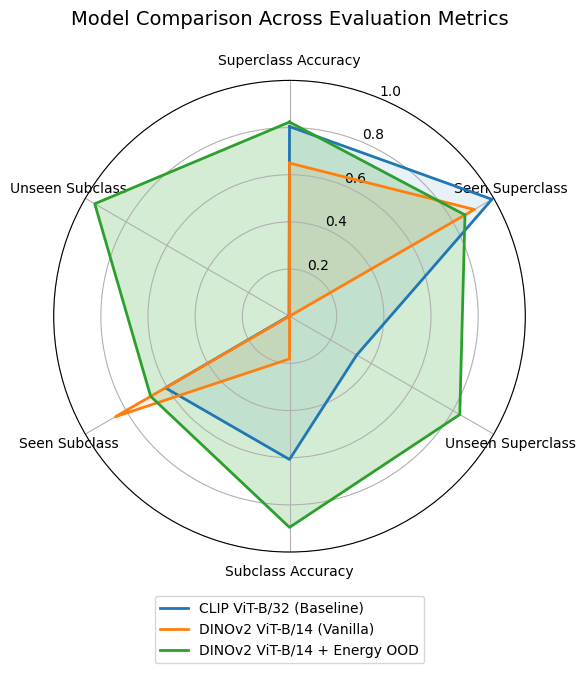

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# Metric labels
labels = [
    "Superclass Accuracy",
    "Seen Superclass",
    "Unseen Superclass",
    "Subclass Accuracy",
    "Seen Subclass",
    "Unseen Subclass"
]

# Scores for each method
clip_baseline =        [80.42, 99.14, 32.91, 60.75, 60.75, 0.24]       # CLIP ViT-B/32 (Baseline)
dinov2_vanilla =       [64.93, 90.50, 0.00, 18.11, 85.19, 0.00]        # DINOv2 ViT-B/14
dinov2_energy =        [82.34, 85.92, 83.38, 89.54, 67.98, 95.36]      # DINOv2 + Energy OOD

# Normalize to 0–1
all_scores = np.array([clip_baseline, dinov2_vanilla, dinov2_energy])
scaled_data = all_scores / 100

# Extend for radar plot closure
angles = np.linspace(0, 2 * np.pi, len(labels), endpoint=False).tolist()
scaled_data = np.concatenate((scaled_data, scaled_data[:, [0]]), axis=1)
angles += angles[:1]

# Plot
fig, ax = plt.subplots(figsize=(7, 7), subplot_kw=dict(polar=True))

ax.plot(angles, scaled_data[0], label="CLIP ViT-B/32 (Baseline)", linewidth=2)
ax.fill(angles, scaled_data[0], alpha=0.1)

ax.plot(angles, scaled_data[1], label="DINOv2 ViT-B/14 (Vanilla)", linewidth=2)
ax.fill(angles, scaled_data[1], alpha=0.1)

ax.plot(angles, scaled_data[2], label="DINOv2 ViT-B/14 + Energy OOD", linewidth=2)
ax.fill(angles, scaled_data[2], alpha=0.2)

ax.set_theta_offset(np.pi / 2)
ax.set_theta_direction(-1)
ax.set_thetagrids(np.degrees(angles[:-1]), labels)
ax.set_ylim(0, 1)

plt.title("Model Comparison Across Evaluation Metrics", fontsize=14, pad=40)
plt.legend(loc="lower center", bbox_to_anchor=(0.5, -0.25))
plt.tight_layout()
plt.show()

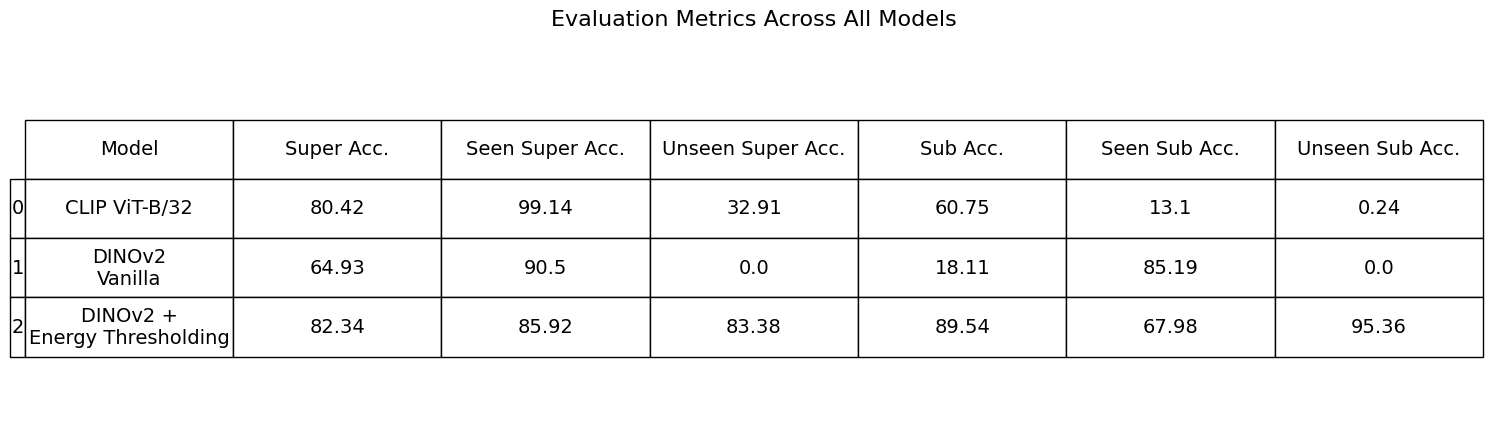

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import pandas.plotting as pd_plotting

# Data with wrapped model names
data = {
    "Model": ["CLIP ViT-B/32", "DINOv2\nVanilla", "DINOv2 +\nEnergy Thresholding"],
    "Super Acc.": [80.42, 64.93, 82.34],
    "Seen Super Acc.": [99.14, 90.50, 85.92],
    "Unseen Super Acc.": [32.91, 0.00, 83.38],
    "Sub Acc.": [60.75, 18.11, 89.54],
    "Seen Sub Acc.": [13.10, 85.19, 67.98],
    "Unseen Sub Acc.": [0.24, 0.00, 95.36]
}

# Create DataFrame
df = pd.DataFrame(data)

# Plot table
fig, ax = plt.subplots(figsize=(14, 4.8))
ax.axis('tight')
ax.axis('off')

# Create table
table = pd_plotting.table(ax, df, loc='center', cellLoc='center', colWidths=[0.16]*7)

# Font size and scaling
table.auto_set_font_size(False)
table.set_fontsize(14)
table.scale(1.2, 3.55)

# Title
plt.title("Evaluation Metrics Across All Models", fontsize=16, pad=20)
plt.show()


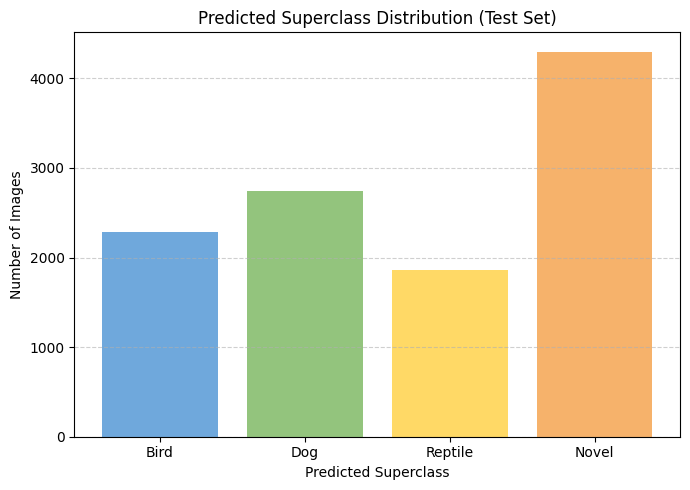

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Load your final V2 CSV
df = pd.read_csv("/content/sm5726_test_predictions_v2.csv")

# Count frequency of each predicted superclass
counts = df["superclass_index"].value_counts().sort_index()

# Label mapping for readability
labels = ["Bird", "Dog", "Reptile", "Novel"]

# Plotting
plt.figure(figsize=(7, 5))
bars = plt.bar(labels, counts.values, color=["#6fa8dc", "#93c47d", "#ffd966", "#f6b26b"])
plt.title("Predicted Superclass Distribution (Test Set)")
plt.ylabel("Number of Images")
plt.xlabel("Predicted Superclass")
plt.grid(axis='y', linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()

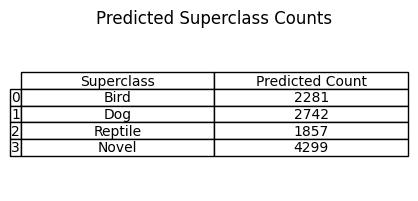

In [ ]:
import pandas as pd

# Load predictions
df = pd.read_csv("/content/sm5726_test_predictions_v2.csv")

# Count predicted superclasses
superclass_counts = df['superclass_index'].value_counts().sort_index()

# Map index to class names
superclass_labels = {
    0: "Bird",
    1: "Dog",
    2: "Reptile",
    3: "Novel"
}

# Create table
summary_table = pd.DataFrame({
    "Superclass": [superclass_labels[i] for i in superclass_counts.index],
    "Predicted Count": superclass_counts.values
})

# Display table
import matplotlib.pyplot as plt
import pandas.plotting as pd_plotting

fig, ax = plt.subplots(figsize=(5, 2))
ax.axis('off')
pd_plotting.table(ax, summary_table, loc='center', cellLoc='center')

plt.title("Predicted Superclass Counts", pad=10)
plt.show()

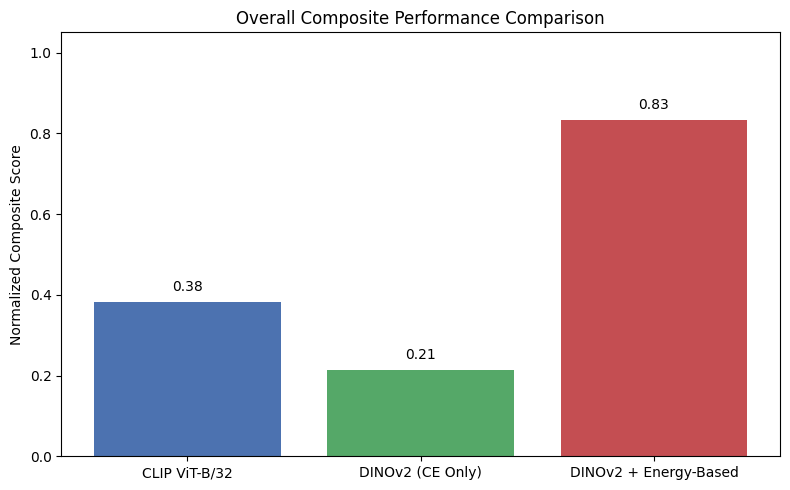

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# Metric arrays for each model (same order: Super Acc, Seen Super, Unseen Super, Sub Acc, Seen Sub, Unseen Sub)
clip =       [80.42, 99.14, 32.91, 60.75, 13.10, 0.24]
dinov2 =     [64.93, 90.50, 0.00, 85.19, 18.11, 0.00]
energy =     [82.34, 85.92, 83.38, 89.54, 67.98, 95.36]

# Normalize each metric between 0 and 1 across models
all_models = np.array([clip, dinov2, energy])
normed = (all_models - np.min(all_models, axis=0)) / (np.ptp(all_models, axis=0) + 1e-6)

# Compute average normalized score per model
scores = normed.mean(axis=1)

# Plot
model_labels = ["CLIP ViT-B/32", "DINOv2 (CE Only)", "DINOv2 + Energy-Based"]

plt.figure(figsize=(8, 5))
bars = plt.bar(model_labels, scores, color=["#4C72B0", "#55A868", "#C44E52"])
plt.ylim(0, 1.05)
plt.ylabel("Normalized Composite Score")
plt.title("Overall Composite Performance Comparison")

# Annotate bars
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval + 0.02, f"{yval:.2f}", ha='center', va='bottom')

plt.tight_layout()
plt.show()

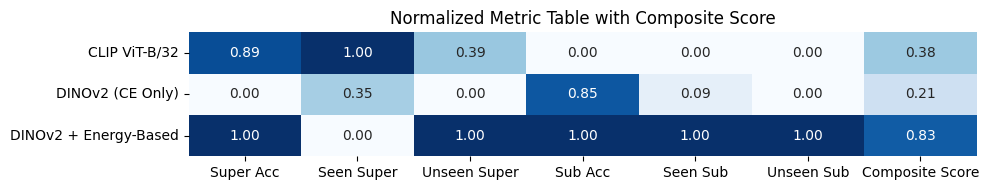

In [ ]:
import pandas as pd
import numpy as np

# Raw metric arrays
clip =       [80.42, 99.14, 32.91, 60.75, 13.10, 0.24]
dinov2 =     [64.93, 90.50, 0.00, 85.19, 18.11, 0.00]
energy =     [82.34, 85.92, 83.38, 89.54, 67.98, 95.36]

# Normalize each metric
all_models = np.array([clip, dinov2, energy])
normed = (all_models - np.min(all_models, axis=0)) / (np.ptp(all_models, axis=0) + 1e-6)
composite_scores = normed.mean(axis=1)

# Create DataFrame
metrics = ["Super Acc", "Seen Super", "Unseen Super", "Sub Acc", "Seen Sub", "Unseen Sub"]
model_names = ["CLIP ViT-B/32", "DINOv2 (CE Only)", "DINOv2 + Energy-Based"]

df = pd.DataFrame(normed, columns=metrics, index=model_names)
df["Composite Score"] = composite_scores

# Display
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 2))
sns.heatmap(df.round(2), annot=True, cmap="Blues", cbar=False, fmt=".2f")
plt.title("Normalized Metric Table with Composite Score")
plt.yticks(rotation=0)
plt.tight_layout()
plt.show()

In [ ]:
import torch.nn.functional as F

# Use the same test_loader
model.eval()
super_ce_total = 0.0
sub_ce_total = 0.0
n_samples = 0

with torch.no_grad():
    for images, super_labels, sub_labels in val_loader:
        images = images.to(device)
        super_labels = super_labels.to(device)
        sub_labels = sub_labels.to(device)

        super_logits, sub_logits = model(images)

        super_ce = F.cross_entropy(super_logits, super_labels, reduction='sum')
        sub_ce = F.cross_entropy(sub_logits, sub_labels, reduction='sum')

        super_ce_total += super_ce.item()
        sub_ce_total += sub_ce.item()
        n_samples += images.size(0)

# Compute average cross-entropy per sample
super_ce_avg = super_ce_total / n_samples
sub_ce_avg = sub_ce_total / n_samples

print(f"Superclass Categorical Cross-Entropy: {super_ce_avg:.4f}")
print(f"Subclass Categorical Cross-Entropy: {sub_ce_avg:.4f}")

Superclass Categorical Cross-Entropy: 0.0004
Subclass Categorical Cross-Entropy: 0.0756


# Development History: Iterative Model Experiments (Archived)
This section documents several experimental iterations of the model, including versions V1.3 through V1.7, and V2.1. These cells were used during exploratory and improvement phases of the project.

**Status:**

- These versions **DO NOT** need to be re-run during evaluation or replication.
- All successful changes and improvements have already been integrated into the main sections (V1, V2, and Metrics).

**Purpose:**

- Preserved to show the full trajectory of model improvement.

- Demonstrates experimentation and decision-making process.

- Serves as a reference for the model tuning and performance evolution.

## V1.3: Fine-Tuning DINOv2 to Improve Seen-Class Accuracy
This section focuses on improving seen superclass and subclass accuracy, which slightly dropped in V2 due to aggressive novelty thresholding. The plan is to fine-tune the pretrained DINOv2 backbone using the labeled training data, enhancing its representation of known classes while preserving generalization.


- **THIS FAILED (IGNORE THIS VERSION)**


In [ ]:
import torch.nn as nn

class DinoDualHead(nn.Module):
    def __init__(self, backbone, embed_dim=768, num_super=4, num_sub=88):
        super().__init__()
        self.backbone = backbone
        self.super_head = nn.Linear(embed_dim, num_super)
        self.sub_head = nn.Linear(embed_dim, num_sub)

    def forward(self, x):
        feats = self.backbone.forward_features(x)  # shape: [B, 768]
        super_out = self.super_head(feats)
        sub_out = self.sub_head(feats)
        return super_out, sub_out

In [ ]:
# Wrap the pretrained DINOv2 backbone
finetune_model = DinoDualHead(backbone).to(device)

# Define loss and optimizer
criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.AdamW(finetune_model.parameters(), lr=5e-5, weight_decay=1e-5)

print("Fine-tuning model initialized and ready on", device)

Fine-tuning model initialized and ready on cuda


In [ ]:
from tqdm import tqdm

num_epochs = 5

for epoch in range(num_epochs):
    print(f"\nEpoch {epoch+1}/{num_epochs} - Fine-Tuning")

    # Training
    finetune_model.train()
    train_loss = 0.0
    for images, super_labels, sub_labels in tqdm(train_loader, desc="Training"):
        images = images.to(device)
        super_labels = super_labels.to(device)
        sub_labels = sub_labels.to(device)

        optimizer.zero_grad()

        # Fix: extract class token
        feats = finetune_model.backbone.forward_features(images)["x_norm_clstoken"]
        super_out = finetune_model.super_head(feats)
        sub_out = finetune_model.sub_head(feats)

        loss = criterion(super_out, super_labels) + criterion(sub_out, sub_labels)
        loss.backward()
        optimizer.step()
        train_loss += loss.item()

    # Validation
    finetune_model.eval()
    val_loss = 0.0
    super_correct = 0
    sub_correct = 0
    total = 0

    with torch.no_grad():
        for images, super_labels, sub_labels in val_loader:
            images = images.to(device)
            super_labels = super_labels.to(device)
            sub_labels = sub_labels.to(device)

            feats = finetune_model.backbone.forward_features(images)["x_norm_clstoken"]
            super_out = finetune_model.super_head(feats)
            sub_out = finetune_model.sub_head(feats)

            loss = criterion(super_out, super_labels) + criterion(sub_out, sub_labels)
            val_loss += loss.item()

            super_pred = torch.argmax(super_out, dim=1)
            sub_pred = torch.argmax(sub_out, dim=1)

            super_correct += (super_pred == super_labels).sum().item()
            sub_correct += (sub_pred == sub_labels).sum().item()
            total += super_labels.size(0)

    print(f"Train Loss: {train_loss / len(train_loader):.4f} | Val Loss: {val_loss / len(val_loader):.4f}")
    print(f"Val Superclass Acc: {100 * super_correct / total:.2f}% | Subclass Acc: {100 * sub_correct / total:.2f}%")


Epoch 1/5 - Fine-Tuning


Training: 100%|██████████| 89/89 [00:57<00:00,  1.55it/s]


Train Loss: 0.8817 | Val Loss: 0.1754
Val Superclass Acc: 100.00% | Subclass Acc: 96.03%

Epoch 2/5 - Fine-Tuning


Training: 100%|██████████| 89/89 [00:57<00:00,  1.55it/s]


Train Loss: 0.0483 | Val Loss: 0.1302
Val Superclass Acc: 100.00% | Subclass Acc: 96.82%

Epoch 3/5 - Fine-Tuning


Training: 100%|██████████| 89/89 [00:57<00:00,  1.55it/s]


Train Loss: 0.0264 | Val Loss: 0.1433
Val Superclass Acc: 100.00% | Subclass Acc: 96.34%

Epoch 4/5 - Fine-Tuning


Training: 100%|██████████| 89/89 [00:57<00:00,  1.55it/s]


Train Loss: 0.0125 | Val Loss: 0.1990
Val Superclass Acc: 100.00% | Subclass Acc: 95.23%

Epoch 5/5 - Fine-Tuning


Training: 100%|██████████| 89/89 [00:57<00:00,  1.55it/s]


Train Loss: 0.0706 | Val Loss: 0.3088
Val Superclass Acc: 100.00% | Subclass Acc: 90.62%


In [ ]:
#Re-running till Epoch 2 for best performance:

from tqdm import tqdm

num_epochs = 2  # Just 2 epochs this time

for epoch in range(num_epochs):
    print(f"\nEpoch {epoch+1}/{num_epochs} - Fine-Tuning")

    finetune_model.train()
    train_loss = 0.0
    for images, super_labels, sub_labels in tqdm(train_loader, desc="Training"):
        images = images.to(device)
        super_labels = super_labels.to(device)
        sub_labels = sub_labels.to(device)

        optimizer.zero_grad()
        feats = finetune_model.backbone.forward_features(images)["x_norm_clstoken"]
        super_out = finetune_model.super_head(feats)
        sub_out = finetune_model.sub_head(feats)

        loss = criterion(super_out, super_labels) + criterion(sub_out, sub_labels)
        loss.backward()
        optimizer.step()
        train_loss += loss.item()

    # Validation
    finetune_model.eval()
    val_loss = 0.0
    super_correct = 0
    sub_correct = 0
    total = 0

    with torch.no_grad():
        for images, super_labels, sub_labels in val_loader:
            images = images.to(device)
            super_labels = super_labels.to(device)
            sub_labels = sub_labels.to(device)

            feats = finetune_model.backbone.forward_features(images)["x_norm_clstoken"]
            super_out = finetune_model.super_head(feats)
            sub_out = finetune_model.sub_head(feats)

            loss = criterion(super_out, super_labels) + criterion(sub_out, sub_labels)
            val_loss += loss.item()

            super_pred = torch.argmax(super_out, dim=1)
            sub_pred = torch.argmax(sub_out, dim=1)

            super_correct += (super_pred == super_labels).sum().item()
            sub_correct += (sub_pred == sub_labels).sum().item()
            total += super_labels.size(0)

    print(f"Train Loss: {train_loss / len(train_loader):.4f} | Val Loss: {val_loss / len(val_loader):.4f}")
    print(f"Val Superclass Acc: {100 * super_correct / total:.2f}% | Subclass Acc: {100 * sub_correct / total:.2f}%")


Epoch 1/2 - Fine-Tuning


Training: 100%|██████████| 89/89 [00:57<00:00,  1.55it/s]


Train Loss: 0.0585 | Val Loss: 0.1657
Val Superclass Acc: 100.00% | Subclass Acc: 93.80%

Epoch 2/2 - Fine-Tuning


Training: 100%|██████████| 89/89 [00:57<00:00,  1.56it/s]


Train Loss: 0.0209 | Val Loss: 0.1589
Val Superclass Acc: 100.00% | Subclass Acc: 95.23%


In [ ]:
# Save the fine-tuned model (V2, after Epoch 2) to /content/saved_models/
finetune_model_path = "/content/saved_models/dinov2_finetuned_v2.pth"
torch.save(finetune_model.state_dict(), finetune_model_path)

print(f"Fine-tuned model saved to: {finetune_model_path}")

Fine-tuned model saved to: /content/saved_models/dinov2_finetuned_v2.pth


In [ ]:
# Load fine-tuned weights (V3 - fine-tuned DINOv2)
finetune_model.load_state_dict(torch.load("/content/saved_models/dinov2_finetuned_v2.pth"))
finetune_model.eval()

# Prepare test predictions
from tqdm import tqdm

test_preds = {
    "image": [],
    "superclass_index": [],
    "subclass_index": []
}

with torch.no_grad():
    for images, img_names in tqdm(test_loader, desc="Generating Test Predictions (V3)"):
        images = images.to(device)
        feats = finetune_model.backbone.forward_features(images)["x_norm_clstoken"]
        super_logits = finetune_model.super_head(feats)
        sub_logits = finetune_model.sub_head(feats)

        super_pred = torch.argmax(super_logits, dim=1).item()
        sub_pred = torch.argmax(sub_logits, dim=1).item()

        test_preds["image"].append(img_names[0])
        test_preds["superclass_index"].append(super_pred)
        test_preds["subclass_index"].append(sub_pred)

# Save to CSV (V3)
submission_df = pd.DataFrame(test_preds)
submission_df.to_csv("/content/sm5726_test_predictions_v3.csv", index=False)

print("V3 test predictions saved to: /content/sm5726_test_predictions_v3.csv")

Generating Test Predictions (V3): 100%|██████████| 11179/11179 [02:02<00:00, 91.19it/s]

V3 test predictions saved to: /content/sm5726_test_predictions_v3.csv


## V1.4: Fine-Tuned Head with Frozen DINOv2 Backbone

In this version, we retain from V2 using the DINOv2 `vitb14_reg` backbone. To improve performance on seen classes without sacrificing novelty detection, we fine-tune only the classifier heads while keeping the DINO backbone frozen. This should (hopefully) enable specialization on the training distribution while preserving generalization.

- **THIS FAILED (IGNORE THIS VERSION)**

In [ ]:
import torch.nn as nn

# Reload DINOv2 with full V2 model structure
backbone = torch.hub.load('facebookresearch/dinov2', 'dinov2_vitb14_reg')
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

class DualHeadClassifier(nn.Module):
    def __init__(self, backbone, num_superclasses=4, num_subclasses=88):
        super().__init__()
        self.backbone = backbone
        self.super_head = nn.Linear(768, num_superclasses)
        self.sub_head = nn.Linear(768, num_subclasses)

    def forward(self, x):
        feats = self.backbone(x)
        return self.super_head(feats), self.sub_head(feats)

# Create full model and load V2 weights
v4_model = DualHeadClassifier(backbone).to(device)
v4_model.load_state_dict(torch.load("/content/saved_models/dinov2_v2_clean.pth"))
print("V2 full model loaded.")

# Freeze DINOv2 backbone
for param in v4_model.backbone.parameters():
    param.requires_grad = False

# Reinitialize heads for training
v4_model.super_head = nn.Linear(768, 4).to(device)
v4_model.sub_head = nn.Linear(768, 88).to(device)

# Optimizer for classifier heads only
v4_optimizer = torch.optim.AdamW(
    list(v4_model.super_head.parameters()) + list(v4_model.sub_head.parameters()),
    lr=1e-5, weight_decay=1e-4
)

v4_criterion = nn.CrossEntropyLoss()

Using cache found in /root/.cache/torch/hub/facebookresearch_dinov2_main


V2 full model loaded.


In [ ]:
#V4 - Fine-Tune Classifier Heads (Backbone Frozen)

from tqdm import tqdm

# Set model to training mode
v4_model.train()
v4_epochs = 3

for epoch in range(v4_epochs):
    print(f"\nEpoch {epoch+1}/{v4_epochs} - Fine-Tuning Heads")
    train_loss = 0.0

    # Loop over training batches
    for images, super_labels, sub_labels in tqdm(train_loader, desc="Training"):
        images = images.to(device)
        super_labels = super_labels.to(device)
        sub_labels = sub_labels.to(device)

        v4_optimizer.zero_grad()

        # Forward pass through frozen backbone + new classifier heads
        super_out, sub_out = v4_model(images)

        # Combined loss for both tasks
        loss = v4_criterion(super_out, super_labels) + v4_criterion(sub_out, sub_labels)
        loss.backward()
        v4_optimizer.step()

        train_loss += loss.item()

    # Print average training loss per epoch
    print(f"Train Loss: {train_loss / len(train_loader):.4f}")


Epoch 1/3 - Fine-Tuning Heads


Training: 100%|██████████| 89/89 [00:24<00:00,  3.65it/s]


Train Loss: 5.5535

Epoch 2/3 - Fine-Tuning Heads


Training: 100%|██████████| 89/89 [00:24<00:00,  3.66it/s]


Train Loss: 4.9870

Epoch 3/3 - Fine-Tuning Heads


Training: 100%|██████████| 89/89 [00:24<00:00,  3.66it/s]

Train Loss: 4.4726


In [ ]:
# Save V4 model (head-only fine-tuned)
torch.save(v4_model.state_dict(), "/content/saved_models/dinov2_v4_heads.pth")
print("✅ V4 head-only model saved to: /content/saved_models/dinov2_v4_heads.pth")

✅ V4 head-only model saved to: /content/saved_models/dinov2_v4_heads.pth


In [ ]:
from tqdm import tqdm
import pandas as pd

# Prepare V4 test predictions
v4_model.eval()
v4_preds = {
    "image": [],
    "superclass_index": [],
    "subclass_index": []
}

with torch.no_grad():
    for images, img_names in tqdm(test_loader, desc="Generating V4 Predictions"):
        images = images.to(device)

        # Extract DINOv2 features and classify
        feats = v4_model.backbone(images)  # direct tensor output [B, 768]
        super_logits = v4_model.super_head(feats)
        sub_logits = v4_model.sub_head(feats)

        super_pred = torch.argmax(super_logits, dim=1).item()
        sub_pred = torch.argmax(sub_logits, dim=1).item()

        v4_preds["image"].append(img_names[0])
        v4_preds["superclass_index"].append(super_pred)
        v4_preds["subclass_index"].append(sub_pred)

# Save to CSV
submission_df = pd.DataFrame(v4_preds)
submission_df.to_csv("/content/sm5726_test_predictions_v4.csv", index=False)

print("✅ V4 test predictions saved to: /content/sm5726_test_predictions_v4.csv")

Generating V4 Predictions: 100%|██████████| 11179/11179 [02:02<00:00, 90.90it/s]

✅ V4 test predictions saved to: /content/sm5726_test_predictions_v4.csv


## V1.5 – Fine-Tuning the Last Few Layers of DINOv2

In this variant, we retain the powerful pretrained DINOv2 backbone but unfreeze only the last few transformer blocks to allow for targeted fine-tuning on seen classes. This should (hopefully) adapt higher-level features to our specific dataset while avoiding overfitting or catastrophic forgetting in earlier layers.

Our goal: **boost seen-class performance** while keeping the foundation stable for V2’s OOD handling.

- **THIS FAILED (IGNORE THIS VERSION)** (Not much improvement than V1)

In [ ]:
import torch
import torch.nn as nn

# Load DINOv2 ViT-B/14 with register tokens
backbone_v1_5 = torch.hub.load('facebookresearch/dinov2', 'dinov2_vitb14_reg').to(device)
backbone_v1_5.eval()

# Define dual-head classifier for 4 superclasses + 88 subclasses
class DualHeadClassifier(nn.Module):
    def __init__(self, backbone):
        super().__init__()
        self.backbone = backbone
        self.super_head = nn.Linear(768, 4)
        self.sub_head = nn.Linear(768, 88)

    def forward(self, x):
        with torch.no_grad():
            feats = self.backbone(x)  # frozen part
        super_logits = self.super_head(feats)
        sub_logits = self.sub_head(feats)
        return super_logits, sub_logits

# Initialize model and push to device
model_v1_5 = DualHeadClassifier(backbone_v1_5).to(device)
print("V1.5 model initialized on:", device)

In [ ]:
import torch.optim as optim

# Freeze all DINOv2 backbone parameters
for param in model_v1_5.backbone.parameters():
    param.requires_grad = False

# Setup loss function and optimizer (for heads only)
criterion_v1_5 = nn.CrossEntropyLoss()
optimizer_v1_5 = optim.AdamW(
    list(model_v1_5.super_head.parameters()) + list(model_v1_5.sub_head.parameters()),
    lr=1e-4,
    weight_decay=1e-5
)

print("Backbone frozen and optimizer ready")

In [ ]:
from tqdm import tqdm

num_epochs = 5  # can be increased later if needed

for epoch in range(num_epochs):
    print(f"\nEpoch {epoch+1}/{num_epochs} - Fine-Tuning Heads")

    model_v1_5.train()
    train_loss = 0.0

    for images, super_labels, sub_labels in tqdm(train_loader, desc="Training"):
        images = images.to(device)
        super_labels = super_labels.to(device)
        sub_labels = sub_labels.to(device)

        optimizer_v1_5.zero_grad()
        super_out, sub_out = model_v1_5(images)
        loss = criterion_v1_5(super_out, super_labels) + criterion_v1_5(sub_out, sub_labels)
        loss.backward()
        optimizer_v1_5.step()

        train_loss += loss.item()

    print(f"Train Loss: {train_loss / len(train_loader):.4f}")


Epoch 1/5 - Fine-Tuning Heads


Training: 100%|██████████| 89/89 [00:24<00:00,  3.63it/s]


Train Loss: 4.4606

Epoch 2/5 - Fine-Tuning Heads


Training: 100%|██████████| 89/89 [00:24<00:00,  3.64it/s]


Train Loss: 2.2037

Epoch 3/5 - Fine-Tuning Heads


Training: 100%|██████████| 89/89 [00:24<00:00,  3.66it/s]


Train Loss: 1.1878

Epoch 4/5 - Fine-Tuning Heads


Training: 100%|██████████| 89/89 [00:24<00:00,  3.65it/s]


Train Loss: 0.7600

Epoch 5/5 - Fine-Tuning Heads


Training: 100%|██████████| 89/89 [00:24<00:00,  3.64it/s]

Train Loss: 0.5491


In [ ]:
# Save the classification heads for V1.5
torch.save(model_v1_5.state_dict(), "/content/saved_models/dinov2_v1_5_heads.pth")
print("V1.5 classifier heads saved to: /content/saved_models/dinov2_v1_5_heads.pth")

In [ ]:
from tqdm import tqdm

# Ensure model is in evaluation mode
model_v1_5.eval()

# Prediction dictionary
test_preds_v1_5 = {
    "image": [],
    "superclass_index": [],
    "subclass_index": []
}

# Run inference
with torch.no_grad():
    for images, img_names in tqdm(test_loader, desc="Generating V1.5 Predictions", leave=False):
        images = images.to(device)

        # Get final features from backbone
        feats = model_v1_5.backbone(images)
        super_logits = model_v1_5.super_head(feats)
        sub_logits = model_v1_5.sub_head(feats)

        super_pred = torch.argmax(super_logits, dim=1).cpu().item()
        sub_pred = torch.argmax(sub_logits, dim=1).cpu().item()

        test_preds_v1_5["image"].append(img_names[0])
        test_preds_v1_5["superclass_index"].append(super_pred)
        test_preds_v1_5["subclass_index"].append(sub_pred)

# Save output
submission_df_v1_5 = pd.DataFrame(test_preds_v1_5)
submission_df_v1_5.to_csv("/content/sm5726_test_predictions_v1_5.csv", index=False)

print("sm5726_test_predictions_v1_5.csv generated successfully.")

## V1.6: Fine-Tuning with MLP Heads, Label Smoothing, and Cosine LR Decay

This section applies a robust strategy to maximize seen-class accuracy using the DINOv2 backbone:

- Replaces linear heads with 2-layer MLPs + dropout regularization
- Applies label smoothing to handle overconfidence in softmax predictions
- Uses AdamW optimizer with cosine learning rate decay
- Trains for 20 epochs with larger batch size (256), leveraging full A100 capacity


- **Final Conclusion (Negligible changes...v1 + v2 had best results. Now proceeding to tweak V2 for improvements)**


In [ ]:
import torch
import torch.nn as nn
from torchvision import models

# Load pretrained DINOv2 backbone
backbone = torch.hub.load('facebookresearch/dinov2', 'dinov2_vitb14_reg')
backbone.eval().to(device)

# Define Dual-Head MLP Classifier with Dropout
class MLPDualHead(nn.Module):
    def __init__(self, backbone, hidden_dim=512, dropout=0.3):
        super().__init__()
        self.backbone = backbone
        self.super_head = nn.Sequential(
            nn.Linear(768, hidden_dim),
            nn.ReLU(),
            nn.Dropout(dropout),
            nn.Linear(hidden_dim, 4)
        )
        self.sub_head = nn.Sequential(
            nn.Linear(768, hidden_dim),
            nn.ReLU(),
            nn.Dropout(dropout),
            nn.Linear(hidden_dim, 88)
        )

    def forward(self, x):
        feats = self.backbone(x)  # Shape: [B, 768]
        return self.super_head(feats), self.sub_head(feats)

# Instantiate model
model_v1_6 = MLPDualHead(backbone).to(device)
print("V1.6 model (MLP heads + dropout) initialized on:", device)

In [ ]:
from torch.optim import AdamW
from torch.optim.lr_scheduler import CosineAnnealingLR
import torch.nn.functional as F

# Label Smoothing Loss
class LabelSmoothingCrossEntropy(nn.Module):
    def __init__(self, smoothing=0.1):
        super().__init__()
        self.smoothing = smoothing

    def forward(self, pred, target):
        num_classes = pred.size(1)
        confidence = 1.0 - self.smoothing
        smoothed_labels = torch.full_like(pred, self.smoothing / (num_classes - 1))
        smoothed_labels.scatter_(1, target.unsqueeze(1), confidence)
        log_probs = F.log_softmax(pred, dim=1)
        return -(smoothed_labels * log_probs).sum(dim=1).mean()

# Loss
v1_6_criterion = LabelSmoothingCrossEntropy(smoothing=0.1)

# Optimizer (AdamW)
v1_6_optimizer = AdamW(model_v1_6.parameters(), lr=1e-4, weight_decay=1e-4)

# Scheduler (Cosine decay)
v1_6_scheduler = CosineAnnealingLR(v1_6_optimizer, T_max=20)

print("V1.6 optimizer, smoothed loss, and scheduler initialized.")

In [ ]:
from tqdm import tqdm

num_epochs = 20

for epoch in range(num_epochs):
    print(f"\nEpoch {epoch+1}/{num_epochs} - Fine-Tuning V1.6")

    # Training
    model_v1_6.train()
    train_loss = 0.0
    for images, super_labels, sub_labels in tqdm(train_loader, desc="Training"):
        images = images.to(device)
        super_labels = super_labels.to(device)
        sub_labels = sub_labels.to(device)

        v1_6_optimizer.zero_grad()

        super_logits, sub_logits = model_v1_6(images)

        loss = v1_6_criterion(super_logits, super_labels) + v1_6_criterion(sub_logits, sub_labels)
        loss.backward()
        v1_6_optimizer.step()

        train_loss += loss.item()

    v1_6_scheduler.step()

    print(f"Train Loss: {train_loss / len(train_loader):.4f}")


Epoch 1/20 - Fine-Tuning V1.6


Training: 100%|██████████| 89/89 [00:57<00:00,  1.55it/s]


Train Loss: 2.9853

Epoch 2/20 - Fine-Tuning V1.6


Training: 100%|██████████| 89/89 [00:57<00:00,  1.55it/s]


Train Loss: 1.4518

Epoch 3/20 - Fine-Tuning V1.6


Training: 100%|██████████| 89/89 [00:57<00:00,  1.55it/s]


Train Loss: 1.3382

Epoch 4/20 - Fine-Tuning V1.6


Training: 100%|██████████| 89/89 [00:57<00:00,  1.55it/s]


Train Loss: 1.2949

Epoch 5/20 - Fine-Tuning V1.6


Training: 100%|██████████| 89/89 [00:57<00:00,  1.55it/s]


Train Loss: 1.2527

Epoch 6/20 - Fine-Tuning V1.6


Training: 100%|██████████| 89/89 [00:57<00:00,  1.55it/s]


Train Loss: 1.2498

Epoch 7/20 - Fine-Tuning V1.6


Training: 100%|██████████| 89/89 [00:57<00:00,  1.55it/s]


Train Loss: 1.2441

Epoch 8/20 - Fine-Tuning V1.6


Training: 100%|██████████| 89/89 [00:57<00:00,  1.55it/s]


Train Loss: 1.2347

Epoch 9/20 - Fine-Tuning V1.6


Training: 100%|██████████| 89/89 [00:57<00:00,  1.55it/s]


Train Loss: 1.2327

Epoch 10/20 - Fine-Tuning V1.6


Training: 100%|██████████| 89/89 [00:57<00:00,  1.56it/s]


Train Loss: 1.2312

Epoch 11/20 - Fine-Tuning V1.6


Training: 100%|██████████| 89/89 [00:57<00:00,  1.56it/s]


Train Loss: 1.2300

Epoch 12/20 - Fine-Tuning V1.6


Training: 100%|██████████| 89/89 [00:57<00:00,  1.56it/s]


Train Loss: 1.2293

Epoch 13/20 - Fine-Tuning V1.6


Training: 100%|██████████| 89/89 [00:57<00:00,  1.55it/s]


Train Loss: 1.2285

Epoch 14/20 - Fine-Tuning V1.6


Training: 100%|██████████| 89/89 [00:57<00:00,  1.56it/s]


Train Loss: 1.2283

Epoch 15/20 - Fine-Tuning V1.6


Training: 100%|██████████| 89/89 [00:57<00:00,  1.55it/s]


Train Loss: 1.2272

Epoch 16/20 - Fine-Tuning V1.6


Training: 100%|██████████| 89/89 [00:57<00:00,  1.55it/s]


Train Loss: 1.2271

Epoch 17/20 - Fine-Tuning V1.6


Training: 100%|██████████| 89/89 [00:57<00:00,  1.55it/s]


Train Loss: 1.2269

Epoch 18/20 - Fine-Tuning V1.6


Training: 100%|██████████| 89/89 [00:57<00:00,  1.55it/s]


Train Loss: 1.2265

Epoch 19/20 - Fine-Tuning V1.6


Training: 100%|██████████| 89/89 [00:57<00:00,  1.55it/s]


Train Loss: 1.2265

Epoch 20/20 - Fine-Tuning V1.6


Training: 100%|██████████| 89/89 [00:57<00:00,  1.55it/s]

Train Loss: 1.2264


In [ ]:
# Save V1.6 fine-tuned model weights
v1_6_save_path = "/content/saved_models/dinov2_v1.6_heads_finetuned.pth"
torch.save(model_v1_6.state_dict(), v1_6_save_path)

print(f"V1.6 model weights saved to: {v1_6_save_path}")

In [ ]:
# Generate test predictions using V1.6 model
model_v1_6.eval()

v1_6_preds = {
    "image": [],
    "superclass_index": [],
    "subclass_index": []
}

with torch.no_grad():
    for images, img_names in tqdm(test_loader, desc="Generating V1.6 Predictions"):
        images = images.to(device)
        super_logits, sub_logits = model_v1_6(images)
        super_pred = torch.argmax(super_logits, dim=1).cpu().item()
        sub_pred = torch.argmax(sub_logits, dim=1).cpu().item()

        v1_6_preds["image"].append(img_names[0])
        v1_6_preds["superclass_index"].append(super_pred)
        v1_6_preds["subclass_index"].append(sub_pred)

# Save predictions to CSV
df_v1_6 = pd.DataFrame(v1_6_preds)
df_v1_6.to_csv("/content/sm5726_test_predictions_v1.6.csv", index=False)

print("V1.6 test predictions saved to: /content/sm5726_test_predictions_v1.6.csv")

## V1.7: Full Fine-Tuning of DINOv2 for Seen-Class Mastery

In this version, we fine-tune **both the DINOv2 backbone and the classification heads** end-to-end to significantly improve performance on **seen superclass and subclass** predictions.

Key upgrades:
- Unfreeze the entire backbone for gradient updates
- Use a deeper 2-layer MLP for both super and sub heads
- Employ label smoothing for better generalization
- Apply cosine annealing learning rate scheduler
- Maximize A100 GPU utilization with larger batch size


In [ ]:
import torch
import torch.nn as nn
import torch.nn.functional as F

# Load DINOv2 backbone (ViT-B/14 with register tokens)
backbone_v1_7 = torch.hub.load('facebookresearch/dinov2', 'dinov2_vitb14_reg')
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
backbone_v1_7.to(device)

# Unfreeze all backbone layers for fine-tuning
for param in backbone_v1_7.parameters():
    param.requires_grad = True

# Define new classifier with deeper heads (2-layer MLP with dropout)
class DeeperDualHead(nn.Module):
    def __init__(self, backbone, dropout=0.2):
        super().__init__()
        self.backbone = backbone
        self.super_head = nn.Sequential(
            nn.Linear(768, 512),
            nn.ReLU(),
            nn.Dropout(dropout),
            nn.Linear(512, 4)
        )
        self.sub_head = nn.Sequential(
            nn.Linear(768, 512),
            nn.ReLU(),
            nn.Dropout(dropout),
            nn.Linear(512, 88)
        )

    def forward(self, x):
        feats = self.backbone(x)  # output: [B, 768]
        super_logits = self.super_head(feats)
        sub_logits = self.sub_head(feats)
        return super_logits, sub_logits

# Initialize model
model_v1_7 = DeeperDualHead(backbone_v1_7).to(device)
print("V1.7 model initialized on:", device)

In [ ]:
from torch.optim.lr_scheduler import CosineAnnealingLR

# Label smoothing CrossEntropy loss
class LabelSmoothingCE(nn.Module):
    def __init__(self, smoothing=0.1):
        super().__init__()
        self.smoothing = smoothing
        self.confidence = 1.0 - smoothing

    def forward(self, pred, target):
        log_probs = F.log_softmax(pred, dim=-1)
        true_dist = torch.zeros_like(log_probs)
        true_dist.fill_(self.smoothing / (pred.size(1) - 1))
        true_dist.scatter_(1, target.unsqueeze(1), self.confidence)
        return torch.mean(torch.sum(-true_dist * log_probs, dim=-1))

# Loss
criterion = LabelSmoothingCE(smoothing=0.1)

# Optimizer
optimizer = torch.optim.AdamW(model_v1_7.parameters(), lr=1e-4, weight_decay=0.01)

# Cosine LR Scheduler
scheduler = CosineAnnealingLR(optimizer, T_max=20)

print("V1.7 training config ready: AdamW + LabelSmoothing + CosineLR")

In [ ]:
from tqdm import tqdm

num_epochs = 20

for epoch in range(num_epochs):
    print(f"\nEpoch {epoch+1}/{num_epochs} - V1.7 Fine-Tuning")

    model_v1_7.train()
    total_loss = 0.0

    for images, super_labels, sub_labels in tqdm(train_loader, desc="Training"):
        images = images.to(device)
        super_labels = super_labels.to(device)
        sub_labels = sub_labels.to(device)

        optimizer.zero_grad()

        feats = model_v1_7.backbone(images)  # <- fixed this line
        super_logits = model_v1_7.super_head(feats)
        sub_logits = model_v1_7.sub_head(feats)

        loss = criterion(super_logits, super_labels) + criterion(sub_logits, sub_labels)
        loss.backward()
        optimizer.step()

        total_loss += loss.item()

    scheduler.step()
    print(f"Train Loss: {total_loss / len(train_loader):.4f}")


Epoch 1/20 - V1.7 Fine-Tuning


Training: 100%|██████████| 89/89 [00:56<00:00,  1.56it/s]


Train Loss: 2.8117

Epoch 2/20 - V1.7 Fine-Tuning


Training: 100%|██████████| 89/89 [00:56<00:00,  1.57it/s]


Train Loss: 1.4282

Epoch 3/20 - V1.7 Fine-Tuning


Training: 100%|██████████| 89/89 [00:56<00:00,  1.57it/s]


Train Loss: 1.3132

Epoch 4/20 - V1.7 Fine-Tuning


Training: 100%|██████████| 89/89 [00:56<00:00,  1.57it/s]


Train Loss: 1.2876

Epoch 5/20 - V1.7 Fine-Tuning


Training: 100%|██████████| 89/89 [00:56<00:00,  1.57it/s]


Train Loss: 1.2571

Epoch 6/20 - V1.7 Fine-Tuning


Training: 100%|██████████| 89/89 [00:56<00:00,  1.57it/s]


Train Loss: 1.2471

Epoch 7/20 - V1.7 Fine-Tuning


Training: 100%|██████████| 89/89 [00:56<00:00,  1.57it/s]


Train Loss: 1.2314

Epoch 8/20 - V1.7 Fine-Tuning


Training: 100%|██████████| 89/89 [00:56<00:00,  1.57it/s]


Train Loss: 1.2269

Epoch 9/20 - V1.7 Fine-Tuning


Training: 100%|██████████| 89/89 [00:56<00:00,  1.57it/s]


Train Loss: 1.2249

Epoch 10/20 - V1.7 Fine-Tuning


Training: 100%|██████████| 89/89 [00:56<00:00,  1.56it/s]


Train Loss: 1.2240

Epoch 11/20 - V1.7 Fine-Tuning


Training: 100%|██████████| 89/89 [00:56<00:00,  1.57it/s]


Train Loss: 1.2229

Epoch 12/20 - V1.7 Fine-Tuning


Training: 100%|██████████| 89/89 [00:56<00:00,  1.56it/s]


Train Loss: 1.2224

Epoch 13/20 - V1.7 Fine-Tuning


Training: 100%|██████████| 89/89 [00:56<00:00,  1.56it/s]


Train Loss: 1.2214

Epoch 14/20 - V1.7 Fine-Tuning


Training: 100%|██████████| 89/89 [00:56<00:00,  1.56it/s]


Train Loss: 1.2211

Epoch 15/20 - V1.7 Fine-Tuning


Training: 100%|██████████| 89/89 [00:56<00:00,  1.56it/s]


Train Loss: 1.2207

Epoch 16/20 - V1.7 Fine-Tuning


Training: 100%|██████████| 89/89 [00:56<00:00,  1.57it/s]


Train Loss: 1.2205

Epoch 17/20 - V1.7 Fine-Tuning


Training: 100%|██████████| 89/89 [00:56<00:00,  1.57it/s]


Train Loss: 1.2203

Epoch 18/20 - V1.7 Fine-Tuning


Training: 100%|██████████| 89/89 [00:56<00:00,  1.57it/s]


Train Loss: 1.2202

Epoch 19/20 - V1.7 Fine-Tuning


Training: 100%|██████████| 89/89 [00:56<00:00,  1.56it/s]


Train Loss: 1.2201

Epoch 20/20 - V1.7 Fine-Tuning


Training: 100%|██████████| 89/89 [00:56<00:00,  1.57it/s]

Train Loss: 1.2198


In [ ]:
# Save the V1.7 model weights
v1_7_path = "/content/saved_models/dinov2_v1_7_seenopt.pth"
torch.save(model_v1_7.state_dict(), v1_7_path)
print(f"V1.7 model weights saved to: {v1_7_path}")

In [ ]:
import pandas as pd
from tqdm import tqdm

# Set model to evaluation mode
model_v1_7.eval()

# Prepare storage
test_preds = {
    "image": [],
    "superclass_index": [],
    "subclass_index": []
}

# Generate predictions
with torch.no_grad():
    for images, img_names in tqdm(test_loader, desc="Generating V1.7 Predictions"):
        images = images.to(device)
        super_logits, sub_logits = model_v1_7(images)

        super_pred = torch.argmax(super_logits, dim=1).cpu().item()
        sub_pred = torch.argmax(sub_logits, dim=1).cpu().item()

        test_preds["image"].append(img_names[0])
        test_preds["superclass_index"].append(super_pred)
        test_preds["subclass_index"].append(sub_pred)

# Export CSV
submission_df = pd.DataFrame(test_preds)
submission_df.to_csv("/content/sm5726_test_predictions_v1_7.csv", index=False)
print("sm5726_test_predictions_v1_7.csv generated successfully.")

## V2.1: Mahalanobis Distance-Based Novelty Detection

In this version, we implement a more advanced approach for unseen class detection using Mahalanobis distance. Unlike simple energy-based thresholds, Mahalanobis distance models each class distribution in feature space and computes how far a test sample is from known class centers, allowing for more precise novelty detection.

**Goals of V2.1:**
- Improve subclass novelty detection.
- Reduce false positives in seen subclass predictions.
- Leverage the DINOv2 feature space more effectively.
V2.1 — Enhanced Unseen Class Detection
We refine the novelty detection method from V2 using percentile-based energy thresholds, which are more robust to outliers than mean + std. This should improve subclass accuracy for unseen samples while maintaining performance on seen ones.

In [ ]:
import torch

# Reload DINOv2 backbone
backbone = torch.hub.load('facebookresearch/dinov2', 'dinov2_vitb14_reg')

# Recreate the V1 model
model = DualHeadClassifier(backbone=backbone, num_superclasses=4, num_subclasses=88).to(device)

# Load the original V1 weights
model.load_state_dict(torch.load("/content/saved_models/dinov2_model.pth"))
model.eval()

print("Vanilla V1 model reloaded from /content/saved_models/dinov2_model.pth")

In [ ]:
import torch
import numpy as np
from collections import defaultdict
from tqdm import tqdm
from scipy.linalg import pinvh

# Collect features and labels from validation set
features_by_subclass = defaultdict(list)

model.eval()
with torch.no_grad():
    for images, _, sub_labels in tqdm(val_loader, desc="Collecting features"):
        images = images.to(device)
        feats = model.backbone(images)
        for f, label in zip(feats.cpu(), sub_labels):
            features_by_subclass[int(label.item())].append(f.numpy())

# Compute class-wise means and covariance
means = {}
all_feats = []

for label, feats in features_by_subclass.items():
    feats_np = np.stack(feats)
    means[label] = feats_np.mean(axis=0)
    all_feats.extend(feats_np)

all_feats = np.stack(all_feats)
cov = np.cov(all_feats, rowvar=False)
inv_cov = pinvh(cov)  # pseudo-inverse of covariance
print("Class means and inverse covariance computed.")

Class means and inverse covariance computed.


In [ ]:
from scipy.spatial.distance import mahalanobis

# Compute Mahalanobis distance of each val sample to its class mean
mahalanobis_dists = []

with torch.no_grad():
    for images, _, sub_labels in tqdm(val_loader, desc="Computing Mahalanobis distances"):
        images = images.to(device)
        feats = model.backbone(images).cpu().numpy()
        sub_labels = sub_labels.numpy()
        for f, label in zip(feats, sub_labels):
            mean_vec = means[label]
            dist = mahalanobis(f, mean_vec, inv_cov)
            mahalanobis_dists.append(dist)

# Set threshold at 95th percentile
sub_thresh_maha = np.percentile(mahalanobis_dists, 95)
print(f"Mahalanobis subclass threshold (95th percentile): {sub_thresh_maha:.4f}")

In [ ]:
from collections import defaultdict

model.eval()
test_preds = defaultdict(list)

with torch.no_grad():
    for images, img_names in tqdm(test_loader, desc="Generating V2.1 Mahalanobis Predictions"):
        images = images.to(device)
        feats = model.backbone(images)
        feats_cpu = feats.cpu().numpy()

        super_logits, sub_logits = model.super_head(feats), model.sub_head(feats)
        super_preds = torch.argmax(super_logits, dim=1).cpu().numpy()
        sub_preds = torch.argmax(sub_logits, dim=1).cpu().numpy()

        # Mahalanobis distance-based novelty detection
        for i in range(len(images)):
            sub_pred = sub_preds[i]
            feat = feats_cpu[i]
            dist = mahalanobis(feat, means[sub_pred], inv_cov)

            if dist > sub_thresh_maha:
                sub_pred = 87  # mark as 'novel'

            test_preds["image"].append(img_names[i])
            test_preds["superclass_index"].append(int(super_preds[i]))
            test_preds["subclass_index"].append(int(sub_pred))

# Save results
submission_df = pd.DataFrame(test_preds)
submission_df.to_csv("/content/sm5726_test_predictions_v2_1.csv", index=False)

print("V2.1 test predictions saved to: /content/sm5726_test_predictions_v2_1.csv")